# 🔬 TIFF Simulator V3.0 - Jupyter Notebook Tutorial

**Willkommen!** Dieses Notebook zeigt dir, wie du den TIFF-Simulator in Jupyter verwenden kannst.

---

## 📋 Voraussetzungen

1. Alle Python-Dateien im gleichen Ordner wie dieses Notebook
2. Dependencies installiert: `pip install -r requirements.txt`
3. Jupyter läuft 😊

---

## 🚀 SETUP - Imports

Zuerst importieren wir alle benötigten Module:

In [1]:
# Standard-Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# TIFF Simulator Module
from tiff_simulator_v3 import (
    TDI_PRESET, 
    TETRASPECS_PRESET, 
    TIFFSimulator, 
    save_tiff,
    get_time_dependent_D
)
from metadata_exporter import MetadataExporter
from batch_simulator import BatchSimulator, PresetBatches

print("✅ Alle Module erfolgreich importiert!")

✅ Alle Module erfolgreich importiert!


## 📊 BEISPIEL 1: Einfache Simulation

Erstelle deine erste TIFF-Simulation!

In [2]:
# 1. Erstelle Simulator
sim = TIFFSimulator(
    detector=TDI_PRESET,           # TDI-G0 Detektor
    mode="polyzeit",               # Polymerisationszeit-Modus
    t_poly_min=60.0,               # 60 Minuten Polymerisation
    astigmatism=False              # Ohne Astigmatismus (2D)
)

# 2. Generiere TIFF
print("Generiere TIFF... (dauert ~10-20 Sekunden)")
tiff_stack = sim.generate_tiff(
    image_size=(64, 64),           # Kleine Bilder für schnelle Tests
    num_spots=5,                   # 5 Fluoreszenz-Spots
    num_frames=50,                 # 50 Frames
    frame_rate_hz=20.0             # 20 Hz = 50 ms pro Frame
)

print(f"✅ TIFF generiert!")
print(f"   Shape: {tiff_stack.shape}")
print(f"   Dtype: {tiff_stack.dtype}")
print(f"   Intensität: [{tiff_stack.min()}, {tiff_stack.max()}]")

Generiere TIFF... (dauert ~10-20 Sekunden)
✅ TIFF generiert!
   Shape: (50, 64, 64)
   Dtype: uint16
   Intensität: [22, 574]


### Visualisierung

Schauen wir uns die ersten 4 Frames an:

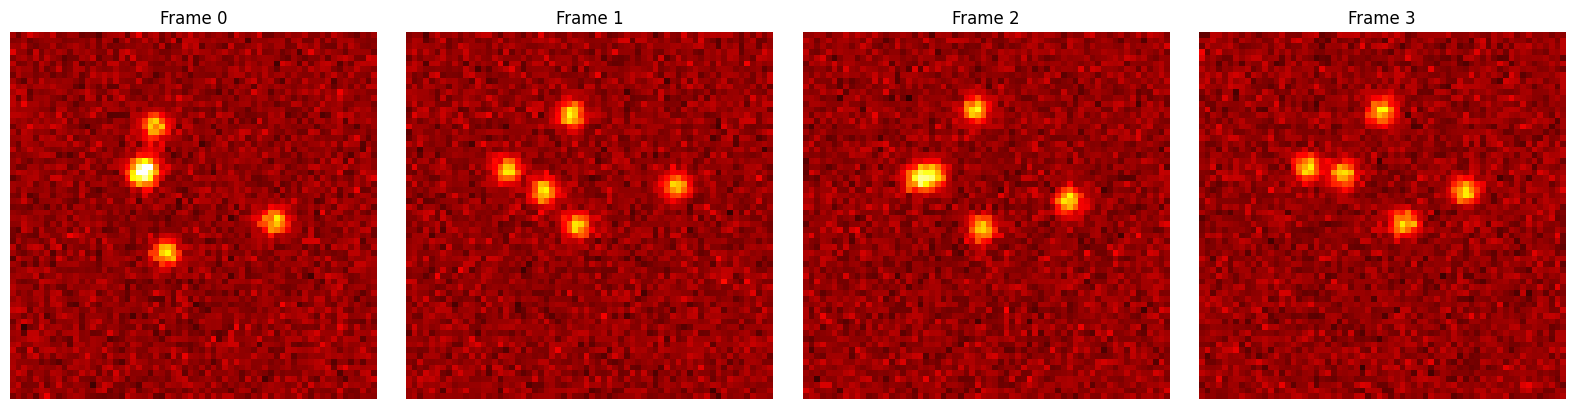

💡 Tipp: Die hellen Spots sind die fluoreszierenden Moleküle!
         Sie bewegen sich von Frame zu Frame (Brownsche Bewegung).


In [3]:
# Plot erste 4 Frames
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.imshow(tiff_stack[i], cmap='hot', vmin=0, vmax=500)
    ax.set_title(f'Frame {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("💡 Tipp: Die hellen Spots sind die fluoreszierenden Moleküle!")
print("         Sie bewegen sich von Frame zu Frame (Brownsche Bewegung).")

### TIFF speichern

In [4]:
# Speichere TIFF
output_path = "meine_erste_simulation.tif"
save_tiff(output_path, tiff_stack)

print(f"✅ TIFF gespeichert: {output_path}")
print(f"   Du kannst es jetzt in ImageJ/Fiji öffnen!")

✅ TIFF gespeichert: meine_erste_simulation.tif
   Shape: (50, 64, 64)
   Dtype: uint16
   Range: [22, 574]
✅ TIFF gespeichert: meine_erste_simulation.tif
   Du kannst es jetzt in ImageJ/Fiji öffnen!


### Metadata exportieren

In [5]:
# Exportiere Metadata
exporter = MetadataExporter(".")
metadata = sim.get_metadata()

# Exportiere alle Formate
paths = exporter.export_all(metadata, "meine_erste_simulation")

print("✅ Metadata exportiert:")
for format_name, path in paths.items():
    print(f"   {format_name.upper()}: {path}")

✅ Metadata exportiert:
   JSON: meine_erste_simulation_metadata.json
   TXT: meine_erste_simulation_metadata.txt
   CSV: batch_metadata.csv


---

## 📊 BEISPIEL 2: Zeitabhängigkeit von D

Untersuchen wir, wie sich der Diffusionskoeffizient D mit der Polymerisationszeit ändert:

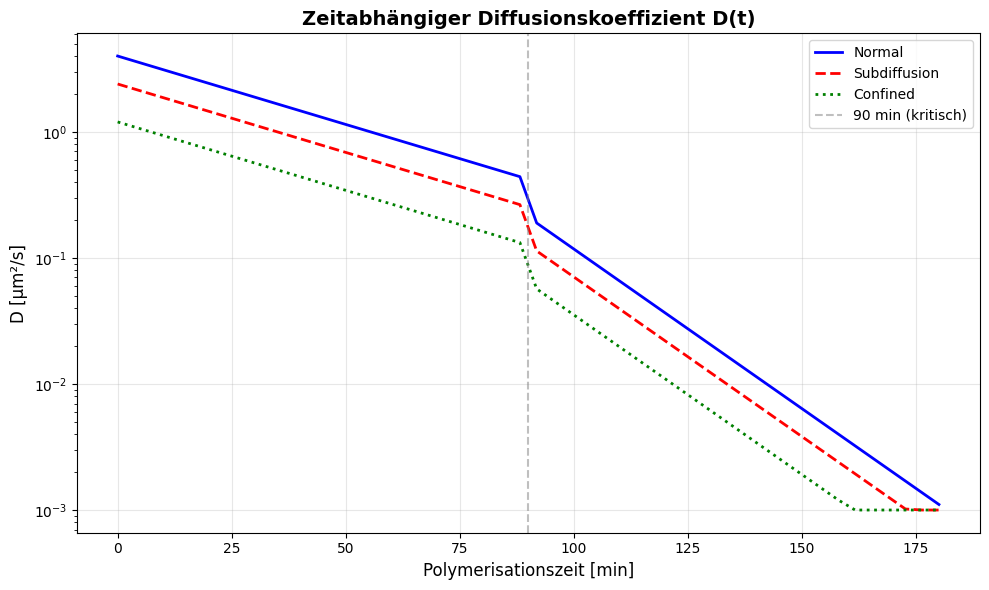

📊 BEOBACHTUNG:
   Bei t=0:     D ≈ 4.000 µm²/s (sehr schnell!)
   Bei t=60:    D ≈ 0.637 µm²/s (mittel)
   Bei t=90:    D ≈ 0.065 µm²/s (langsam)
   Bei t=180:   D ≈ 0.001 µm²/s (sehr langsam!)

   → Ab 90 min wird D EXTREM klein! 🔥


In [6]:
# Berechne D für verschiedene Zeiten
times = np.linspace(0, 180, 50)  # 0 bis 180 Minuten
D_initial = 4.0  # [µm²/s]

# Berechne D-Werte
D_normal = [get_time_dependent_D(t, D_initial, "normal") for t in times]
D_sub = [get_time_dependent_D(t, D_initial, "subdiffusion") for t in times]
D_confined = [get_time_dependent_D(t, D_initial, "confined") for t in times]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(times, D_normal, 'b-', linewidth=2, label='Normal')
plt.plot(times, D_sub, 'r--', linewidth=2, label='Subdiffusion')
plt.plot(times, D_confined, 'g:', linewidth=2, label='Confined')

plt.axvline(90, color='gray', linestyle='--', alpha=0.5, label='90 min (kritisch)')

plt.xlabel('Polymerisationszeit [min]', fontsize=12)
plt.ylabel('D [µm²/s]', fontsize=12)
plt.title('Zeitabhängiger Diffusionskoeffizient D(t)', fontsize=14, fontweight='bold')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("📊 BEOBACHTUNG:")
print(f"   Bei t=0:     D ≈ {D_normal[0]:.3f} µm²/s (sehr schnell!)")
print(f"   Bei t=60:    D ≈ {D_normal[20]:.3f} µm²/s (mittel)")
print(f"   Bei t=90:    D ≈ {D_normal[30]:.3f} µm²/s (langsam)")
print(f"   Bei t=180:   D ≈ {D_normal[-1]:.3f} µm²/s (sehr langsam!)")
print("\n   → Ab 90 min wird D EXTREM klein! 🔥")

---

## 🔄 BEISPIEL 3: Batch-Simulation

Erstelle mehrere TIFFs automatisch (für Polymerisationszeit-Studien):

In [ ]:
# Erstelle Batch-Simulator
batch = BatchSimulator("./batch_output")

# Füge Polymerisationszeit-Serie hinzu
batch.add_polyzeit_series(
    times=[30, 60, 90],              # 3 Zeitpunkte
    detector=TDI_PRESET,              # TDI-G0
    repeats=2,                        # 2 Wiederholungen
    image_size=(512, 512),              # Klein für schnellen Test
    num_spots=5,
    num_frames=30
)

print(f"📋 Batch enthält {len(batch.tasks)} Tasks")
print("\nTasks:")
for i, task in enumerate(batch.tasks, 1):
    print(f"   {i}. {task['filename']} (t={task['t_poly_min']} min)")

📋 Batch enthält 6 Tasks

Tasks:
   1. tdi-g0_t30min_rep1.tif (t=30 min)
   2. tdi-g0_t30min_rep2.tif (t=30 min)
   3. tdi-g0_t60min_rep1.tif (t=60 min)
   4. tdi-g0_t60min_rep2.tif (t=60 min)
   5. tdi-g0_t90min_rep1.tif (t=90 min)
   6. tdi-g0_t90min_rep2.tif (t=90 min)


### Batch ausführen

**⚠️ WARNUNG:** Dies kann einige Minuten dauern!

In [8]:
# Führe Batch aus
stats = batch.run()

print("\n✅ BATCH ABGESCHLOSSEN!")
print(f"   Erfolgreich: {stats['completed']}")
print(f"   Fehlgeschlagen: {stats['failed']}")
print(f"   Dauer: {(stats['end_time'] - stats['start_time']).total_seconds():.1f} s")


🔄 BATCH SIMULATION START
Anzahl Tasks: 6
Output Dir: batch_output


Simulationen:  50%|█████     | 3/6 [00:00<00:00, 21.67it/s]

✅ TIFF gespeichert: batch_output\tdi-g0_t30min_rep1.tif
   Shape: (30, 64, 64)
   Dtype: uint16
   Range: [22, 582]
✅ TIFF gespeichert: batch_output\tdi-g0_t30min_rep2.tif
   Shape: (30, 64, 64)
   Dtype: uint16
   Range: [22, 427]
✅ TIFF gespeichert: batch_output\tdi-g0_t60min_rep1.tif
   Shape: (30, 64, 64)
   Dtype: uint16
   Range: [27, 452]
✅ TIFF gespeichert: batch_output\tdi-g0_t60min_rep2.tif
   Shape: (30, 64, 64)
   Dtype: uint16
   Range: [24, 433]
✅ TIFF gespeichert: batch_output\tdi-g0_t90min_rep1.tif
   Shape: (30, 64, 64)
   Dtype: uint16
   Range: [24, 440]


Simulationen: 100%|██████████| 6/6 [00:00<00:00, 20.93it/s]

✅ TIFF gespeichert: batch_output\tdi-g0_t90min_rep2.tif
   Shape: (30, 64, 64)
   Dtype: uint16
   Range: [23, 419]

🎉 BATCH SIMULATION ABGESCHLOSSEN
Gesamt: 6
✅ Erfolgreich: 6
❌ Fehlgeschlagen: 0
⏱️  Dauer: 0.3 s (0.0 min)
📁 Output: batch_output
📊 Statistik gespeichert: batch_output\batch_statistics.json

✅ BATCH ABGESCHLOSSEN!
   Erfolgreich: 6
   Fehlgeschlagen: 0
   Dauer: 0.3 s


---

## 🔺 BEISPIEL 4: 3D-Simulation mit Astigmatismus

Für 3D-Lokalisierung (ThunderSTORM, etc.):

In [9]:
# 3D-Simulation
sim_3d = TIFFSimulator(
    detector=TDI_PRESET,
    mode="polyzeit_astig",            # MIT Astigmatismus!
    t_poly_min=60.0,
    astigmatism=True                  # WICHTIG für 3D
)

print("Generiere 3D-TIFF... (dauert ~20-30 Sekunden)")
tiff_3d = sim_3d.generate_tiff(
    image_size=(64, 64),
    num_spots=5,
    num_frames=50,
    frame_rate_hz=20.0
)

print("✅ 3D-TIFF generiert!")

# Speichern
save_tiff("simulation_3d.tif", tiff_3d)
print("💾 Gespeichert: simulation_3d.tif")
print("\n💡 WICHTIG: Die PSF ist jetzt elliptisch je nach z-Position!")
print("           Perfekt für 3D-Lokalisierung mit ThunderSTORM.")

Generiere 3D-TIFF... (dauert ~20-30 Sekunden)


ValueError: lam value too large

### Vergleich: 2D vs 3D Spots

In [ ]:
# Zeige Unterschied zwischen 2D und 3D
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 2D (ohne Astigmatismus)
ax1.imshow(tiff_stack[10], cmap='hot', vmin=0, vmax=500)
ax1.set_title('2D Simulation (ohne Astigmatismus)', fontsize=12, fontweight='bold')
ax1.axis('off')

# 3D (mit Astigmatismus)
ax2.imshow(tiff_3d[10], cmap='hot', vmin=0, vmax=500)
ax2.set_title('3D Simulation (mit Astigmatismus)', fontsize=12, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("💡 BEOBACHTUNG:")
print("   2D: Spots sind rund (kreisförmige PSF)")
print("   3D: Spots können elliptisch sein (z-abhängige PSF)")
print("       → Ermöglicht Rekonstruktion der z-Position! 🎉")

---

## 📊 BEISPIEL 5: z-Stack Kalibrierung

In [ ]:
# z-Stack für Kalibrierung
sim_z = TIFFSimulator(
    detector=TDI_PRESET,
    mode="z_stack",
    astigmatism=True
)

print("Generiere z-Stack... (dauert ~10-15 Sekunden)")
z_stack = sim_z.generate_z_stack(
    image_size=(64, 64),
    num_spots=10,
    z_range_um=(-1.0, 1.0),          # -1 bis +1 µm
    z_step_um=0.2                     # 0.2 µm Steps = 11 Slices
)

print(f"✅ z-Stack generiert: {z_stack.shape[0]} Slices")

# Speichern
save_tiff("z_calibration.tif", z_stack)
print("💾 Gespeichert: z_calibration.tif")

### Visualisiere z-Stack

In [ ]:
# Zeige z-Stack als Montage
n_slices = z_stack.shape[0]
n_cols = 4
n_rows = (n_slices + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

z_positions = np.linspace(-1.0, 1.0, n_slices)

for i in range(n_slices):
    axes[i].imshow(z_stack[i], cmap='hot', vmin=0, vmax=500)
    axes[i].set_title(f'z = {z_positions[i]:.2f} µm', fontsize=10)
    axes[i].axis('off')

# Leere Plots ausblenden
for i in range(n_slices, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("💡 BEOBACHTUNG:")
print("   Die Spots ändern ihre Form mit z!")
print("   → Perfekt für PSF-Kalibrierung in ThunderSTORM! 🎯")

---

## 🎓 ZUSAMMENFASSUNG

Du hast gelernt:

✅ **Single Simulation**: Einfache TIFF-Generierung  
✅ **D(t) Analyse**: Zeitabhängigkeit des Diffusionskoeffizienten  
✅ **Batch-Modus**: Automatisierte Generierung mehrerer TIFFs  
✅ **3D-Simulation**: Mit Astigmatismus für 3D-Lokalisierung  
✅ **z-Stack**: Kalibrierung für 3D-Software  

---

## 📚 NÄCHSTE SCHRITTE

1. **Analysiere deine TIFFs** in ImageJ/Fiji mit:
   - TrackMate (Tracking)
   - ThunderSTORM (3D-Lokalisierung)
   - MSD-Analyse Plugins

2. **Erstelle systematische Studien** mit dem Batch-Modus

3. **Vergleiche mit realen Daten** aus deinen Experimenten

4. **Lies die README.md** für wissenschaftliche Details!

---

## 💡 TIPPS

- **Start klein**: 64×64 px, 5 Spots, 30 Frames für Tests
- **Nutze Metadata**: Dokumentiere ALLE Parameter!
- **Wiederhole Simulationen**: 3-5× für Statistik
- **Vergleiche Parameter**: z.B. verschiedene Polyzeiten

---

**Viel Erfolg mit deiner Masterthesis! 🔬✨**